# A Tutorial to implement data science model on a high dimensional dataset

Import Python Packages

In [458]:
# dataframe package
import numpy as np
import pandas as pd

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize

# linear regression
from sklearn.linear_model import LinearRegression
# lasso regression
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn import linear_model

# model evalutaion
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# plot
import matplotlib.pyplot as plt

## First, we want to read in training dataset and preprocess the dataset

In [459]:
# Read in all the data.
# I choose to drop the NA data because they are only a few compared to the whole dataset. 
# Deleting these NA rows will have negligible effect on the analysis process.

data = pd.read_csv('cryoocyte_1_regression_train.csv')
df = data.dropna()
df_copy=df.copy()

In [460]:
#filter out the columns which are not float and process each one
print(df_copy.select_dtypes(include=['object']).head())

    x14 x48       x52     x83        x84     x97
0   Aug   D   $621.35  Yellow  wednesday  -0.01%
1   Jun   B  $1269.85   Orang    tuesday  -0.01%
2   Jun   B   $972.98   Orang    tuesday  -0.01%
3  July   B  $-153.38   Orang    tuesday    0.0%
4   Jun   B   $-326.5  Yellow  wednesday   0.01%


### For each of the non-numeric variables, we want to see if they are significant to y by simply plotting the means in each variable. If so, then we keep these variables and transform the data type/format.

                y
x14              
Apr      0.053122
Aug     -0.026118
Dev     -0.106637
Feb      0.127195
January  0.130706
July    -0.005716
Jun      0.013357
Mar      0.064913
May      0.031390
Nov     -0.096861
Oct     -0.067782
sept.   -0.053503


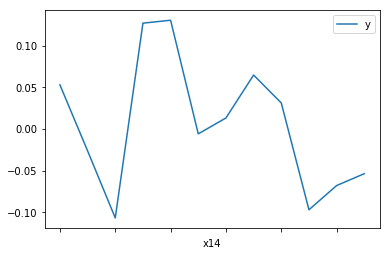

In [461]:
# x14
df_x14_mean = df_copy[['x14','y']]
df_x14_mean = df_x14_mean.groupby(['x14']).mean()
df_x14_mean.plot()
print (df_x14_mean)

From the plot, we can see that x14 is signicant to y, so we continue to transform the data

In [462]:
# Assign the numeric value to x14
d = {'Aug':8, 'Jun':6, 'July':7, 'sept.':9, 'Apr':4 ,'May':5, 'Oct':10 ,'Mar':3 ,'Nov':11 ,'January':1, 'Feb':2,'Dev':12}
df_copy['x14'] = df_copy['x14'].map(d)
print(df_copy['x14'].head())

0    8
1    6
2    6
3    7
4    6
Name: x14, dtype: int64


            y
x48          
A   -0.255165
B   -0.005208
D    0.228908


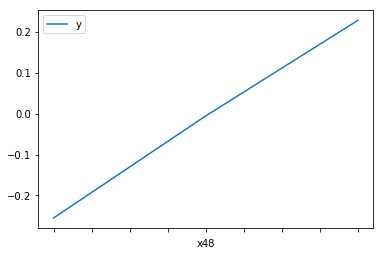

In [463]:
# Similar to x14, we plot the dataset groupby the mean of y in each category in x48.
df_x48_mean = df_copy[['x48','y']]
df_x48_mean = df_x48_mean.groupby(['x48']).mean()
df_x48_mean.plot()
print (df_x48_mean)

In [464]:
# x48 is very significant to y. Similar to x14, we assign the numerica value to x48
dict48 = {'A':1, 'B':2, 'D':3}
df_copy['x48'] = df_copy['x48'].map(dict48)
print(df_copy['x48'].head())

0    3
1    2
2    2
3    2
4    2
Name: x48, dtype: int64


In [465]:
# Use string strip to take out the $ sign in x52
df_copy['x52'] = df_copy['x52'].str.strip('$')
df_copy['x52'] = pd.to_numeric(df_copy['x52'])
print(df_copy['x52'].head())

0     621.35
1    1269.85
2     972.98
3    -153.38
4    -326.50
Name: x52, dtype: float64


               y
x83             
Orang  -0.136016
Yellow  0.099512
blue    0.377305
red    -0.428398


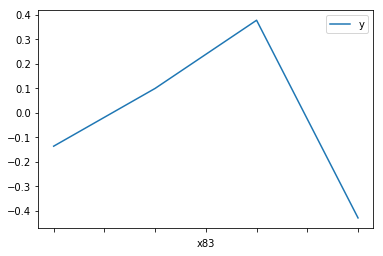

In [466]:
# Similar process to x14 and x48
df_x83_mean = df_copy[['x83','y']]
df_x83_mean = df_x83_mean.groupby(['x83']).mean()
df_x83_mean.plot()
print (df_x83_mean)

In [467]:
dict83 = {'Orang':1, 'Yellow':2, 'blue':3,'red':4}
df_copy['x83'] = df_copy['x83'].map(dict83)
print(df_copy['x83'].head())

0    2
1    1
2    1
3    1
4    2
Name: x83, dtype: int64


                  y
x84                
friday     0.462135
monday    -0.200215
sat       -0.569496
sun       -0.370224
thursday   0.286546
tuesday   -0.037676
wednesday  0.122701


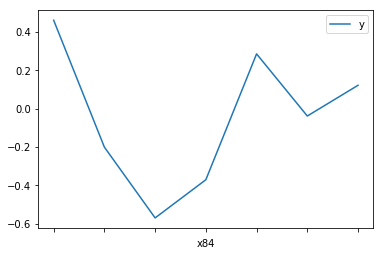

In [468]:
# Similar process to x14, x48 and x83
df_x84_mean = df_copy[['x84','y']]
df_x84_mean = df_x84_mean.groupby(['x84']).mean()
df_x84_mean.plot()
print (df_x84_mean)

In [469]:
dict84 = {'friday':5, 'monday':1, 'sat':3,'sun':7,'thursday':4, 'tuesday':2, 'wednesday':3}
df_copy['x84'] = df_copy['x84'].map(dict84)
print(df_copy['x84'].head())

0    3
1    2
2    2
3    2
4    3
Name: x84, dtype: int64


In [470]:
# Use string strip to take out the % sign in x97

df_copy['x97'] = df_copy['x97'].str.strip('%')
df_copy['x97'] = pd.to_numeric(df_copy['x97'])
df_copy['x97'] = df_copy['x97'].div(100).round(4)
print(df_copy['x97'].head())

0   -0.0001
1   -0.0001
2   -0.0001
3    0.0000
4    0.0001
Name: x97, dtype: float64


## Second, we want to divide the dataset into Train and Validation set (70%-30%) and rescale the data because of the data scale imbalance.

In [471]:
# Separate out the x_data and y_data.
x_data = df_copy.loc[:, df_copy.columns != "y"]
y_data = df_copy.loc[:, "y"]

In [472]:
# The random state to use while splitting the data.
random_state = 100

In [473]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.3 ,random_state= random_state, shuffle = True)

In [474]:
# Applying scalar to the x dataset
scaler_train = StandardScaler().fit(x_train)
scaler_test = StandardScaler().fit(x_test)
x_train_s = scaler_train.transform(x_train)
x_test_s = scaler_test.transform(x_test)

## Third, we start to apply models to the preprocessed dataset, both Training and Validation. Then we evaluate which model has a higher accuracy. 

###  Linear Regression Model.

In [475]:
clflm = LinearRegression()
clflm.fit(x_train_s,y_train)

y_pred_lm_train =clflm.predict(x_train_s)
y_pred_lm_test = clflm.predict(x_test_s)

We use r_2 and RMSE to measure the accuracy of the model.


The higher the r2 or the lower RMSE, the better accuracy.

In [476]:
r2_lm_train= r2_score(y_train, y_pred_lm_train)
r2_lm_test= r2_score(y_test, y_pred_lm_test)
print("Linear Reg r2 Train", r2_lm_train)
print("Linear Reg r2 Test", r2_lm_test)

mse_lm_train= mean_squared_error(y_train, y_pred_lm_train)
mse_lm_test = mean_squared_error(y_test, y_pred_lm_test)
print('Linear Reg RMSE Train', sqrt(mse_lm_train))
print('Linear Reg RMSE Test', sqrt(mse_lm_test))

Linear Reg r2 Train 0.9383503727123947
Linear Reg r2 Test 0.9348168892671871
Linear Reg RMSE Train 0.04980092232837731
Linear Reg RMSE Test 0.051469210482093235


### Lasso Rgression Model
The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent.

Lasso linear model with iterative fitting along a regularization path. The best model is selected by cross-validation.
The optimization objective for Lasso is: 

(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [477]:
#lasso regression
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn import linear_model

In [478]:
#change tol to 0.01 to make the iter converges in LassoCV
clf_la = LassoCV(n_alphas = 100,cv=100, random_state=0,normalize=True,tol=0.01)
clf_la.fit(x_train, y_train)

y_pred_la_train = clf_la.predict(x_train)
y_pred_la_test = clf_la.predict(x_test)

In [479]:
r2_la_train= r2_score(y_train, y_pred_la_train)
r2_la_test= r2_score(y_test, y_pred_la_test)
print("Lasso Reg r2 Train", r2_la_train)
print("Lasso Reg r2 Test", r2_la_test)

mse_la_train= mean_squared_error(y_train, y_pred_la_train)
mse_la_test = mean_squared_error(y_test, y_pred_la_test)
print('Lasso Reg RMSE Train', sqrt(mse_la_train))
print('Lasso Reg RMSE Test', sqrt(mse_la_test))

Lasso Reg r2 Train 0.9365069284454811
Lasso Reg r2 Test 0.9372997827764117
Lasso Reg RMSE Train 0.05054001040348781
Lasso Reg RMSE Test 0.050479435294885425


### Model Comparison

We compare these two model using r2 and rmse in the validation set.

Linear Reg r2 Test: 0.9348168892671871

Lasso Reg r2 Test: 0.9372997827764117

Linear Reg RMSE Test: 0.051469210482093235

Lasso Reg RMSE Test 0.050479435294885425

Both of the regression has high r2 and small RMSE, while Lasso Regression is slightly better then the Linear Regression.

## Predicting Y in the test dataset using Lasso Regression

In [480]:
# Read in all the data
data_test = pd.read_csv('cryoocyte_1_regression_test.csv')
df_copy_test =data_test.copy()

Similar to the training data preprocessing:

In [481]:
dict14 = {'Aug':8, 'Jun':6, 'July':7, 'sept.':9, 'Apr':4 ,'May':5, 'Oct':10 ,'Mar':3 ,'Nov':11 ,'January':1, 'Feb':2,'Dev':12}
df_copy_test['x14'] = df_copy_test['x14'].map(dict14)

In [482]:
dict48 = {'A':1, 'B':2, 'D':3}
df_copy_test['x48'] = df_copy_test['x48'].map(dict48)

In [483]:
df_copy_test['x52'] = df_copy_test['x52'].str.strip('$')
df_copy_test['x52'] = pd.to_numeric(df_copy_test['x52'])

In [484]:
dict83 = {'Orang':1, 'Yellow':2, 'blue':3,'red':4}
df_copy_test['x83'] = df_copy_test['x83'].map(dict83)

In [485]:
dict84 = {'friday':5, 'monday':1, 'sat':3,'sun':7,'thursday':4, 'tuesday':2, 'wednesday':3}
df_copy_test['x84'] = df_copy_test['x84'].map(dict84)

In [486]:
df_copy_test['x97'] = df_copy_test['x97'].str.strip('%')
df_copy_test['x97'] = pd.to_numeric(df_copy_test['x97'])
df_copy_test['x97'] = df_copy_test['x97'].div(100).round(4)

### Data reprocess and y prediction
In the testing dataset, in order to get all predicted y for the whole test dataset, we can fill in the N/A data with the mean of the column. (small effect on the prediction)

In [487]:
# new dataset with filled na
df_update_test = df_copy_test.fillna(df_copy_test.mean())

In [488]:
x_pred = df_update_test.loc[:, df_copy_test.columns != "y"]

clf_la = LassoCV(n_alphas = 100,cv=100, random_state=0,normalize=True,tol=0.01)
clf_la.fit(x_train, y_train)

y_pred = clf_la.predict(x_pred)

Write the dataframe with the predicted y to a new csv file

In [491]:
# create a copy of the original test dataset and append the predicted y to it
data_new_csv = data_test.copy()
data_new_csv['y'] = y_pred

#print the first 5 rows of the new data
print(data_new_csv.head())

# write to csv
data_new_csv.to_csv('test_updated_y.csv')

         x0        x1        x2        x3        x4        x5        x6  \
0 -0.000960  0.000012 -0.000822  0.000095 -0.000228  0.000386  0.000349   
1 -0.000842 -0.000058 -0.000400 -0.000457 -0.000221  0.000046 -0.000093   
2 -0.000200 -0.001776  0.000425 -0.000156  0.000885  0.000509 -0.000451   
3 -0.000732  0.000539 -0.000806  0.000489 -0.001849  0.000316  0.000564   
4  0.000276  0.000122 -0.000073  0.001005 -0.000849 -0.000221 -0.000048   

         x7        x8        x9    ...          x91       x92       x93  \
0 -0.000026 -0.000045 -0.000233    ...    -0.000342 -0.000266  0.000702   
1  0.000039  0.000220 -0.000225    ...    -0.000132 -0.000120 -0.000369   
2 -0.000132 -0.000086 -0.000272    ...    -0.000575 -0.000131  0.000107   
3  0.000859  0.000363 -0.001000    ...    -0.000515 -0.000116 -0.000990   
4 -0.000667 -0.000191  0.000325    ...    -0.000374  0.000431 -0.000899   

        x94       x95       x96     x97       x98       x99         y  
0  0.000827 -0.000604 -0.0